<a href="https://colab.research.google.com/github/massirism/Data-Analytics-CUC/blob/main/RINITIS_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Miguel Massiris, PRÁCTICA PREDICTIVA .**

In [ ]:
#LIBRERÍAS
import pandas as pd
import sklearn
import numpy as np  #Operaciones con matrices
import matplotlib.pyplot as plt #Graficas

In [ ]:
#Cargar datos
df=pd.read_excel("Medicamentos rinitis.xlsx",sheet_name="Historico")
df.head()

,ID,EDAD,SEXO,PRESIÓN SANGUÍNEA,COLESTEROL,SODIO,POTASIO,MEDICAMENTO
0,1,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,2,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,3,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,4,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,5,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [ ]:
df.info()
#Datos completos y sin nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 200 non-null    int64  
 1   EDAD               200 non-null    int64  
 2   SEXO               200 non-null    object 
 3   PRESIÓN SANGUÍNEA  200 non-null    object 
 4   COLESTEROL         200 non-null    object 
 5   SODIO              200 non-null    float64
 6   POTASIO            200 non-null    float64
 7   MEDICAMENTO        200 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 12.6+ KB


In [ ]:
#Revisión datos numéricos
df.describe()

,ID,EDAD,SODIO,POTASIO
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,44.235000,0.697095,0.049901
std,57.879185,16.669105,0.118907,0.017654
min,1.000000,14.000000,0.500169,0.020022
25%,50.750000,31.000000,0.583887,0.034697
50%,100.500000,45.000000,0.721853,0.049187
75%,150.250000,58.000000,0.801494,0.065663
max,200.000000,74.000000,0.896056,0.079788


#Descripción de variables categóricas 

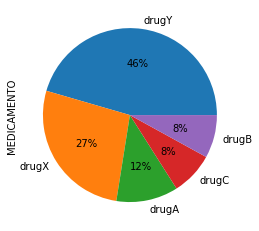

In [ ]:
df["MEDICAMENTO"].value_counts().plot(kind="pie",autopct="%.0f%%")

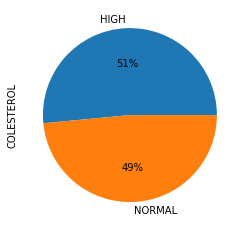

In [ ]:
df["COLESTEROL"].value_counts().plot(kind="pie",autopct="%.0f%%")

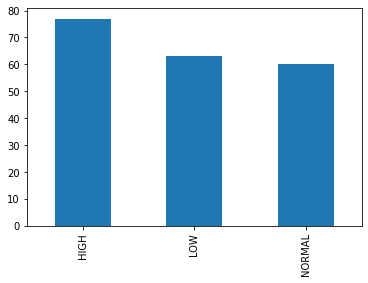

In [ ]:
df["PRESIÓN SANGUÍNEA"].value_counts().plot(kind="bar")

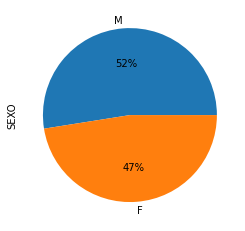

In [ ]:
df["SEXO"].value_counts().plot(kind="pie",autopct="%.0f%%")

#Descripción de variables numéricas

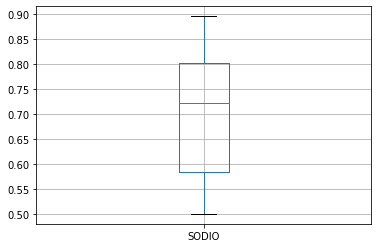

In [ ]:
df.boxplot(column=["SODIO"], return_type='axes')



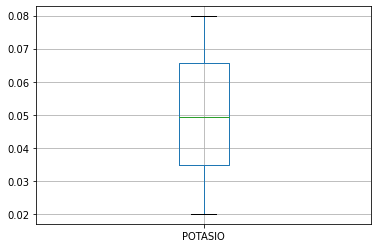

In [ ]:
df.boxplot(column=["POTASIO"], return_type='axes')

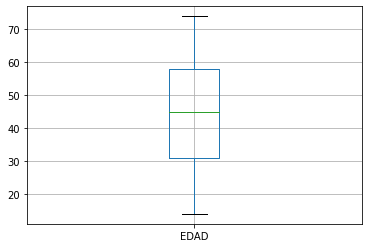

In [ ]:
df.boxplot(column="EDAD", return_type='axes')

#Eliminación de variables innecesarias

In [ ]:
ids=df["ID"].value_counts() #Cuenta la frecuencia en la que se repite cada ID
ids[ids>1]

Series([], Name: ID, dtype: int64)

In [ ]:
df=df.drop("ID",axis=1) #Eliminamos el ID por ser irrelevante, axis=1 indica que es una columna.df_train=df_train.drop("ID",axis=1) 

In [ ]:
df.describe()

,EDAD,SODIO,POTASIO
count,200.000000,200.000000,200.000000
mean,44.235000,0.697095,0.049901
std,16.669105,0.118907,0.017654
min,14.000000,0.500169,0.020022
25%,31.000000,0.583887,0.034697
50%,45.000000,0.721853,0.049187
75%,58.000000,0.801494,0.065663
max,74.000000,0.896056,0.079788


In [ ]:
df.head()

,EDAD,SEXO,PRESIÓN SANGUÍNEA,COLESTEROL,SODIO,POTASIO,MEDICAMENTO
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [ ]:
#Creamos variables dummy para convertir  las categorías a números
df= pd.get_dummies(df, columns=['PRESIÓN SANGUÍNEA'], drop_first=False)
df= pd.get_dummies(df, columns=['SEXO', 'COLESTEROL'], drop_first=True)


#labelencoder-> Variable objetivo 
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df["MEDICAMENTO"] = labelencoder.fit_transform(df["MEDICAMENTO"])
df.head()

,EDAD,SODIO,POTASIO,MEDICAMENTO,PRESIÓN SANGUÍNEA_HIGH,PRESIÓN SANGUÍNEA_LOW,PRESIÓN SANGUÍNEA_NORMAL,SEXO_M,COLESTEROL_NORMAL
0,23,0.792535,0.031258,4,1,0,0,0,0
1,47,0.739309,0.056468,2,0,1,0,1,0
2,47,0.697269,0.068944,2,0,1,0,1,0
3,28,0.563682,0.072289,3,0,0,1,0,0
4,61,0.559294,0.030998,4,0,1,0,0,0


# Realizo el split del df, 70/30.

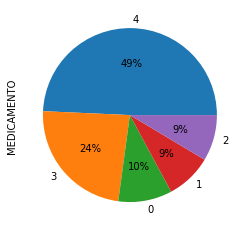

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split

X = df.drop("MEDICAMENTO", axis = 1)  # Variables predictoras
Y = df['MEDICAMENTO']                 #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) #El no muestreo no estratificado
Y_train.value_counts().plot(kind="pie",autopct="%.0f%%")

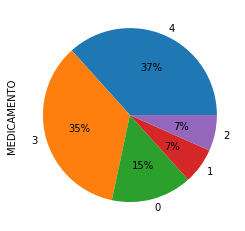

In [ ]:
Y_test.value_counts().plot(kind="pie",autopct="%.0f%%")

#APRENDIZAJE DEL MODELO
# **Tree de Clasificación**
* Variables categóricas en dummies ✅
* Variable objetivo con labelencoder ✅

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=8)
modelTree.fit(X_train, Y_train) #70% train

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2)

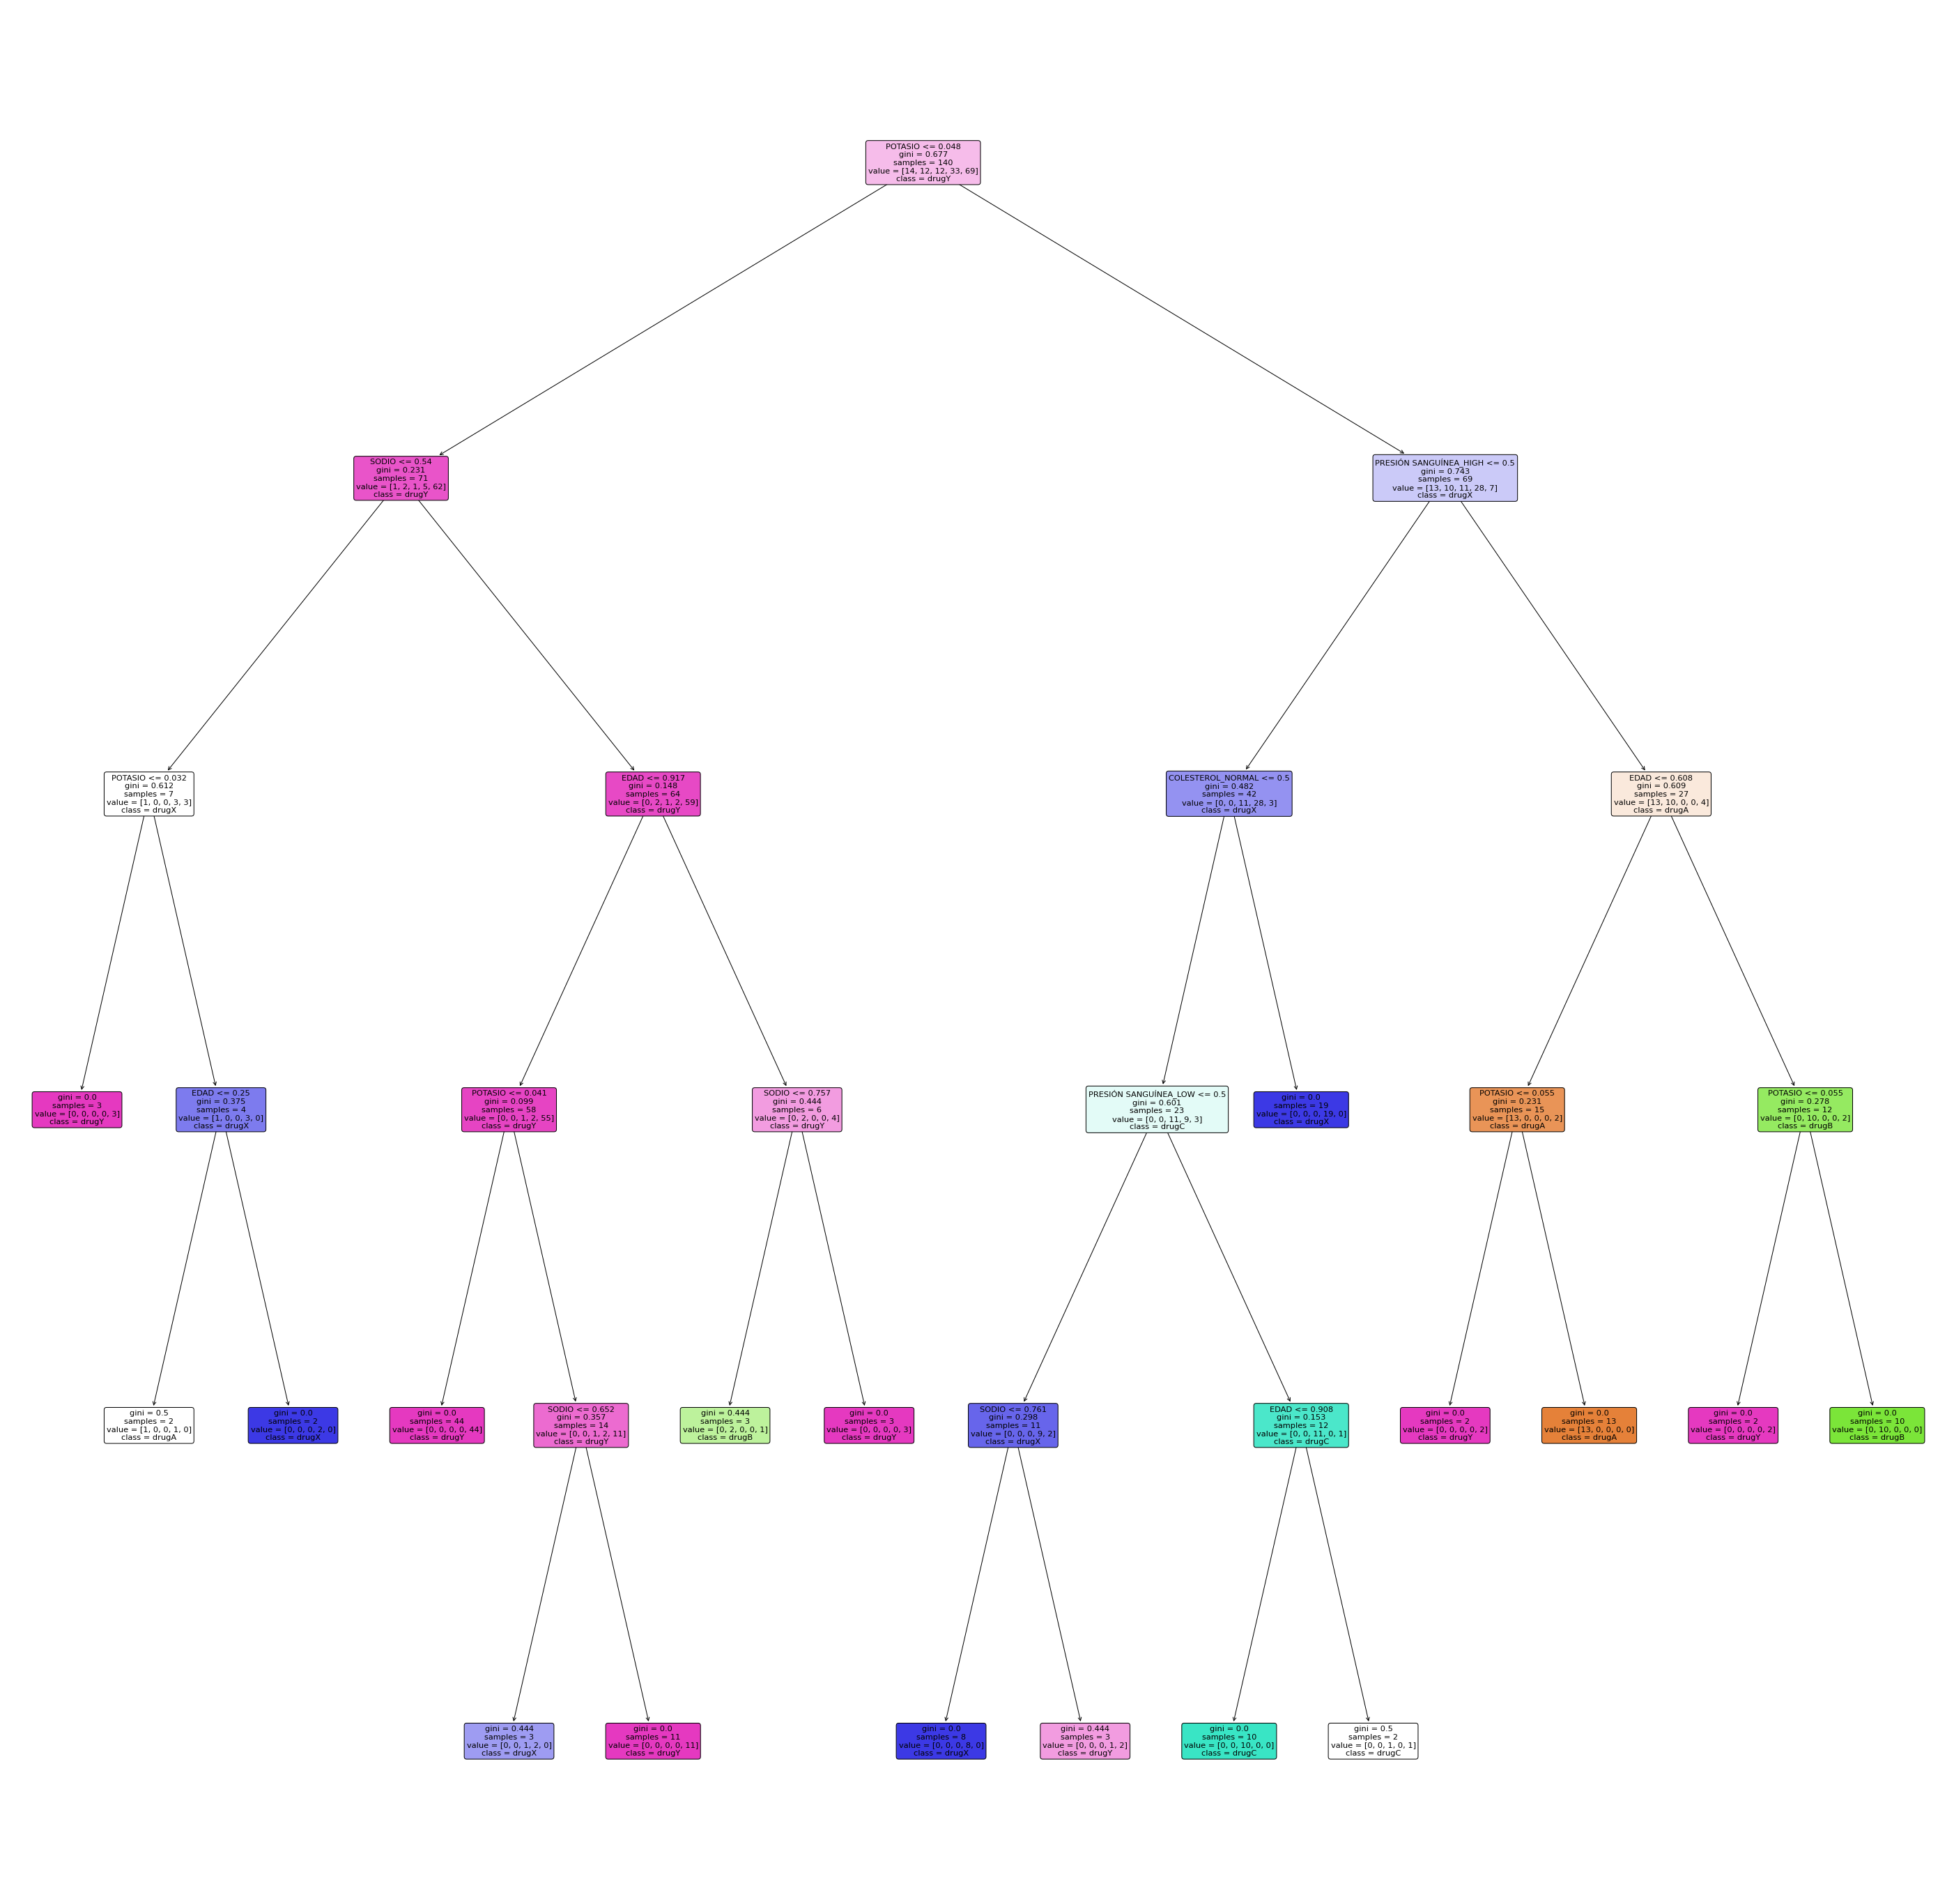

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

In [ ]:
#Evaluación 30%: Exactitud
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
#Comparación Y_test y Y_pred
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred) #Exactitud
print("La exactitud es de "+str(exactitud))

La exactitud es de 0.8166666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


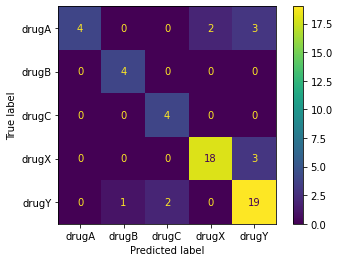

              precision    recall  f1-score   support

       drugA       1.00      0.44      0.62         9
       drugB       0.80      1.00      0.89         4
       drugC       0.67      1.00      0.80         4
       drugX       0.90      0.86      0.88        21
       drugY       0.76      0.86      0.81        22

    accuracy                           0.82        60
   macro avg       0.83      0.83      0.80        60
weighted avg       0.84      0.82      0.81        60



In [ ]:
#Matriz de confusion
from sklearn import metrics

metrics.plot_confusion_matrix(estimator=modelTree, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  
plt.show()
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

#Guardo el modelo del arból de decisión

In [ ]:
import pickle
filename = 'modelo-clas-tree.pkl'
variables= X.columns._values
pickle.dump([modelTree,labelencoder,variables], open(filename, 'wb')) #write

#CLASIFICACION CON KNN
*  Variables numéricas normalizadas
*  Variables categórticas en dummies
*  Variable objetivo con label_encoder

In [ ]:
#Normalizacion de las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df[['EDAD']]) #Se ajustan los paramatros de normalizacion

#se aplica la normalizacion al X_train y X_test
X_train[['EDAD']]= min_max_scaler.transform(X_train[['EDAD']]) #70%
X_test[['EDAD']]= min_max_scaler.transform(X_test[['EDAD']])   #30%
X_train.head()

,EDAD,SODIO,POTASIO,PRESIÓN SANGUÍNEA_HIGH,PRESIÓN SANGUÍNEA_LOW,PRESIÓN SANGUÍNEA_NORMAL,SEXO_M,COLESTEROL_NORMAL
115,0.616667,0.838490,0.045831,1,0,0,1,0
80,0.766667,0.805651,0.057821,1,0,0,1,0
29,0.516667,0.753504,0.041976,0,1,0,1,0
117,0.433333,0.512517,0.050730,0,0,1,0,0
134,0.466667,0.533228,0.025348,1,0,0,0,0


In [ ]:
#Aprendizaje knn con 70%

from sklearn.neighbors import KNeighborsClassifier
import math as m

#k=int(m.sqrt(200))+3   #Cant de vecinos
k=3

model_knn=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
model_knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Maximum accuracy: 0.6666666666666666 at K = 3


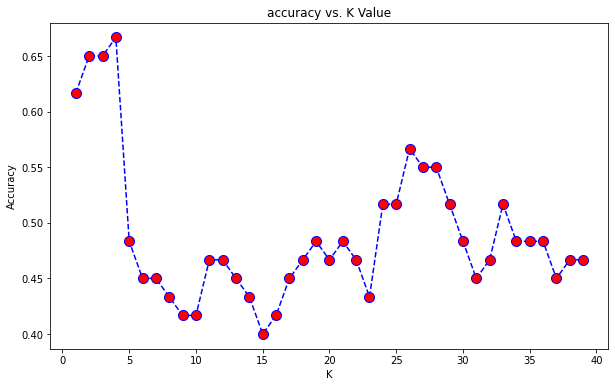

In [ ]:
#Para verificar mi decisión usaré un código que ví en una materia de mi universidad
acc = []

from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


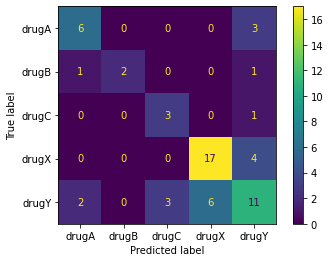

              precision    recall  f1-score   support

       drugA       0.67      0.67      0.67         9
       drugB       1.00      0.50      0.67         4
       drugC       0.50      0.75      0.60         4
       drugX       0.74      0.81      0.77        21
       drugY       0.55      0.50      0.52        22

    accuracy                           0.65        60
   macro avg       0.69      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60



In [ ]:
#Evaluación knn con 30%

from sklearn import metrics

Y_pred=model_knn.predict(X_test) #30%

#Matriz de confusión
metrics.plot_confusion_matrix(estimator=model_knn, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  
plt.show()
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

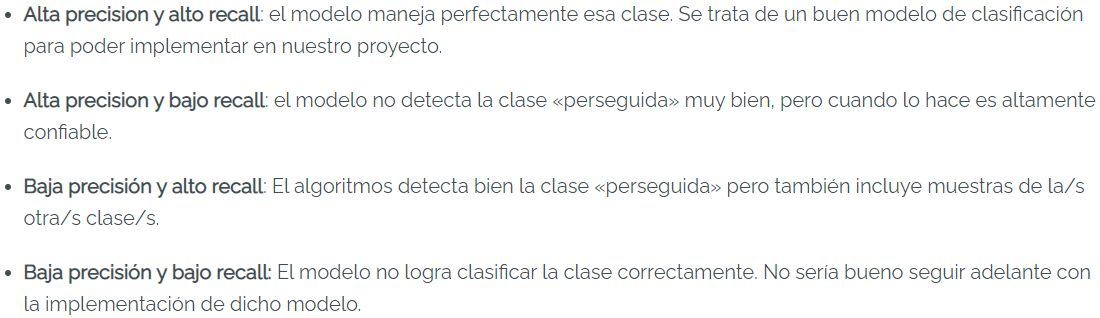

In [ ]:
import pickle
filename = 'modelo-clas-tree-knn.pkl'
variables= X.columns._values
pickle.dump([modelTree,model_knn,labelencoder,variables,min_max_scaler], open(filename, 'wb')) #write